In [ ]:
# Import libraries and packages

from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
import numpy as np

!pip install dmba
from dmba import classificationSummary
from dmba import regressionSummary
import pydotplus
from IPython.display import Image
import numbers
from matplotlib import pyplot as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


In [ ]:
# Import dataset

df = pd.read_csv('ToyotaCorolla.csv')

In [ ]:
# Only keep the important variables

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model','Tow_Bar', 'Price']

In [ ]:
# Converts categorical data into dummy or indicator variables

pred_processed = pd.get_dummies(df[predictors], drop_first=True)

In [ ]:
# Use transformer to scale the data to the range [0,1]
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(pred_processed)
print(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns = pred_processed.columns)
scaled_data.head()

[[0.27848101 0.19335471 0.17073171 ... 0.3250444  1.         0.        ]
 [0.27848101 0.30014938 0.17073171 ... 0.3339254  1.         0.        ]
 [0.29113924 0.1716468  0.17073171 ... 0.3410302  1.         0.        ]
 ...
 [0.88607595 0.07002086 0.13821138 ... 0.14742451 0.         1.        ]
 [0.87341772 0.06960934 0.13821138 ... 0.10301954 0.         1.        ]
 [0.94936709 0.         0.33333333 ... 0.09236234 0.         1.        ]]


,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Price,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.278481,0.193355,0.170732,0.0,0.333333,0.723485,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.325044,1.0,0.0
1,0.278481,0.300149,0.170732,0.0,0.333333,0.723485,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.333925,1.0,0.0
2,0.291139,0.171647,0.170732,0.0,0.333333,0.723485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341030,1.0,0.0
3,0.316456,0.197528,0.170732,0.0,0.333333,0.723485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376554,1.0,0.0
4,0.367089,0.158433,0.170732,0.0,0.333333,0.723485,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333925,1.0,0.0


In [ ]:
outcome = 'Price'
predictors = [c for c in pred_processed.columns if c != outcome]

# partition data
X = scaled_data[predictors]
y = scaled_data[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Train_X   :', train_X.shape)
print('Valid_X :', valid_X.shape)
print('Train_y   :', train_y.shape)
print('Valid_y :', valid_y.shape)

Train_X   : (861, 16)
Valid_X : (575, 16)
Train_y   : (861,)
Valid_y : (575,)


In [ ]:
def RMS(clf):
  clf.fit(train_X, train_y)
  # training performance 
  trainPrediction = clf.predict(train_X)
  rms_train = mean_squared_error(train_y, trainPrediction, squared=False)
  print("RMS for training: ", rms_train)
  print("r2 score:", (r2_score(train_y, trainPrediction))*100)


  # validation performance
  validPrediction = clf.predict(valid_X)
  rms_valid = mean_squared_error(valid_y, validPrediction, squared=False)
  print("RMS for validation: ",rms_valid)
  print("r2 score:", (r2_score(valid_y, validPrediction))*100)

In [ ]:
# Neural network model 1: single hidden layer with two nodes

clf1 = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs',
                    random_state=1)

clf1.fit(train_X, train_y)

# RMS error for the training and validation data
RMS(clf1)

RMS for training:  0.039504573010147336
r2 score: 90.99775449837699
RMS for validation:  0.03833282815047873
r2 score: 90.4970113958388


In [ ]:
# Neural network model 2: single hidden layer with five nodes
clf2 = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs',
                    random_state=1)

clf2.fit(train_X, train_y)

# RMS error for the training and validation data
RMS(clf2)

RMS for training:  0.03986695013430701
r2 score: 90.83184104727083
RMS for validation:  0.03926157199859368
r2 score: 90.03094819412263


In [ ]:
# Neural network model 3: two layers, five nodes in each layer
clf3 = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs',
                    random_state=1)

clf3.fit(train_X, train_y)

# RMS error for the training and validation data
RMS(clf3)

RMS for training:  0.039857718570233694
r2 score: 90.83608650107865
RMS for validation:  0.039756564475811426
r2 score: 89.77799284591535


### Semi-Conclusion: 

The RMS error for the training and validation data both increase as the number of layers and nodes increase, we can say this is because the model is overfitting the training data.

In [ ]:
# Use GridSearchCV for hyperparameter tuning 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Train neural network with 2 hidden nodes
clf = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y)

param_grid = {
    'hidden_layer_sizes': [(2), (5), (5,5)], 
}

# apply grid search
gridSearch = GridSearchCV(MLPRegressor(activation='logistic', solver='lbfgs', random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8968011620822883
Initial parameters:  {'hidden_layer_sizes': 5}


In [ ]:
# GridSearch CV to find the appropriate number of layers and nodes:

display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

  param_hidden_layer_sizes  mean_test_score  std_test_score
0                        2         0.896082        0.009678
1                        5         0.896801        0.004626
2                   (5, 5)         0.896265        0.009892


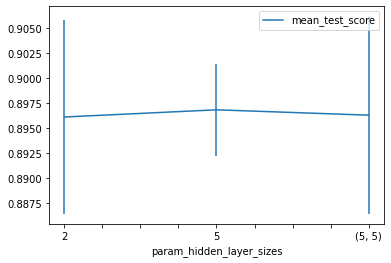

In [ ]:
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                                                   y='mean_test_score', yerr='std_test_score')

plt.show()

### Summary:

Based on the hyperparameter tuning using GridSearchCV, 1 layer and 5 nodes performs the best since it has 

* lower RMS error than (2 layers, 5 nodes) 

* higher mean_test_score than (1 layer, 2 nodes).